In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pyreadstat
import re
from datetime import datetime

In [2]:
pd.options.display.max_columns = 100

In [3]:
df_1 = pd.read_csv("../project_data/Datafiniti_Vegetarian_and_Vegan_Restaurants.csv")

In [4]:
df_1.head(n=10)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,claimed,country,cuisines,descriptions.dateSeen,descriptions.sourceURLs,descriptions.value,facebookPageURL,features.key,features.value,hours.day,hours.dept,hours.hour,imageURLs,isClosed,keys,languagesSpoken,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.category,menus.currency,menus.dateSeen,menus.description,menus.name,menus.sourceURLs,name,paymentTypes,phones,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,sic,sourceURLs,twitter,websites,yearOpened
0,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://igx.4sqi.net/img/general/600x600/o_h1i...,NaN,us/ca/albany/1045sanpabloave/-1106202297,NaN,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,NaN,USD,2016-04-22T02:48:00.000Z,"Squash, carrots, butternut squash and potato",Baked Kabocha,https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,NaN,(510) 528-2375,94706,NaN,NaN,NaN,CA,NaN,https://foursquare.com/v/potala-organic-cafe/4...,NaN,"http://www.potala.us/,http://potala.us",NaN
1,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://igx.4sqi.net/img/general/600x600/o_h1i...,NaN,us/ca/albany/1045sanpabloave/-1106202297,NaN,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,NaN,USD,2016-04-22T02:48:00.000Z,With wild blend brown rice,Short Grain Brown Rice,https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,NaN,(510) 528-2375,94706,NaN,NaN,NaN,CA,NaN,https://foursquare.com/v/potala-organic-cafe/4...,NaN,"http://www.potala.us/,http://potala.us",NaN
2,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://igx.4sqi.net/img/general/600x600/o_h1i...,NaN,us/ca/albany/1045sanpabloave/-1106202297,NaN,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,NaN,USD,2016-04-22T02:48:00.000Z,NaN,Green Bean Veggie Soup,https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,NaN,(510) 528-2375,94706,NaN,NaN,NaN,CA,NaN,https://foursquare.com/v/potala-organic-cafe/4...,NaN,"http://www.potala.us/,http://potala.us",NaN
3,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://igx.4sqi.net/img/general/600x600/o_h1i...,NaN,us/ca/albany/1045sanpabloave/-1106202297,NaN,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,8.95,8.95,NaN,USD,2016-04-22T02:48:00.000Z,NaN,"Steamed Broccoli, Carrots and Turnips",https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,NaN,(510) 528-2375,94706,NaN,NaN,NaN,CA,NaN,https://foursquare.com/v/potala-organic-cafe/4...,NaN,"http://www.potala.us/,http://potala.us",NaN
4,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://igx.4sqi.net/img/general/600x600/o_h1i...,NaN,us/ca/albany/1045sanpabloave/-1106202297,NaN,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,NaN,USD,2016-04-22T02:48:00.000Z,With vinegar tahini beet dressing,Mixed Green Salad,https://foursquare.com/v/potala-organ

In [5]:
df_1.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'claimed', 'country', 'cuisines',
       'descriptions.dateSeen', 'descriptions.sourceURLs',
       'descriptions.value', 'facebookPageURL', 'features.key',
       'features.value', 'hours.day', 'hours.dept', 'hours.hour', 'imageURLs',
       'isClosed', 'keys', 'languagesSpoken', 'latitude', 'longitude',
       'menuPageURL', 'menus.amountMax', 'menus.amountMin', 'menus.category',
       'menus.currency', 'menus.dateSeen', 'menus.description', 'menus.name',
       'menus.sourceURLs', 'name', 'paymentTypes', 'phones', 'postalCode',
       'priceRangeCurrency', 'priceRangeMin', 'priceRangeMax', 'province',
       'sic', 'sourceURLs', 'twitter', 'websites', 'yearOpened'],
      dtype='object')

In [6]:
df_1.isna().sum()

id                             0
dateAdded                      0
dateUpdated                    0
address                        0
categories                     0
primaryCategories              0
city                           0
claimed                     9311
country                        0
cuisines                       0
descriptions.dateSeen      10000
descriptions.sourceURLs    10000
descriptions.value         10000
facebookPageURL             9063
features.key               10000
features.value             10000
hours.day                  10000
hours.dept                 10000
hours.hour                 10000
imageURLs                   4866
isClosed                    9963
keys                           0
languagesSpoken            10000
latitude                       0
longitude                      0
menuPageURL                    0
menus.amountMax                0
menus.amountMin                0
menus.category              4070
menus.currency                53
menus.date

In [6]:
df_1.shape

(10000, 47)

#### Data for Borough analysis

In [7]:
df_borough = df_1[['city','latitude','longitude']]

In [8]:
df_borough.dropna(inplace=True)

<ipython-input-8-b65ebdbe2bb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_borough.dropna(inplace=True)


In [10]:
df_borough.shape

(10000, 3)

In [11]:
df_borough.to_csv('../project_data/borough_analysis.csv',index=False)

In [12]:
df_1['longitude'].nunique()

204

In [13]:
df_1['latitude'].nunique()

204

In [47]:
datetime.fromisoformat('2020-01-06T00:00:00.000Z'[:-1])

datetime.datetime(2020, 1, 6, 0, 0)

In [112]:
def func(x):
    try:
        x = datetime.fromisoformat(x[:-1])
        x = x.strftime('%Y-%m')
    except Exception as e:
        x = None
    return x

In [119]:
df_1['date'] = df_1['dateAdded'].apply(lambda x:func(x))

In [120]:
df_1['date']

0       2016-04
1       2016-04
2       2016-04
3       2016-04
4       2016-04
         ...   
9995    2016-03
9996    2016-03
9997    2016-03
9998    2016-03
9999    2016-03
Name: date, Length: 10000, dtype: object

In [121]:
df_1['date'].value_counts()

2017-06    2409
2016-03    1789
2017-10    1529
2017-07     861
2015-10     818
2016-05     486
2016-04     393
2015-11     249
2018-04     218
2017-03     154
2016-02     128
2017-04     120
2017-08      97
2018-01      95
2016-11      92
2015-07      79
2016-06      76
2016-09      74
2014-01      73
2018-05      72
2015-06      60
2017-09      56
2016-01      39
2016-08      20
2017-01      13
Name: date, dtype: int64

In [122]:
df_time_series = df_1['date'].value_counts().rename_axis('date').reset_index(name='counts')

In [123]:
df_time_series

,date,counts
0,2017-06,2409
1,2016-03,1789
2,2017-10,1529
3,2017-07,861
4,2015-10,818
5,2016-05,486
6,2016-04,393
7,2015-11,249
8,2018-04,218
9,2017-03,154


In [124]:
df_time_series.to_csv('../project_data/timeseries_opening_of_restuarants.csv',index=False)

In [108]:
df_time_series = df_time_series.sort_values(by='date')

In [110]:
df_time_series

,date,counts
18,2014-01,73
20,2015-06,60
15,2015-07,79
4,2015-10,818
7,2015-11,249
22,2016-01,39
10,2016-02,128
1,2016-03,1789
6,2016-04,393
5,2016-05,486


<AxesSubplot:xlabel='date'>

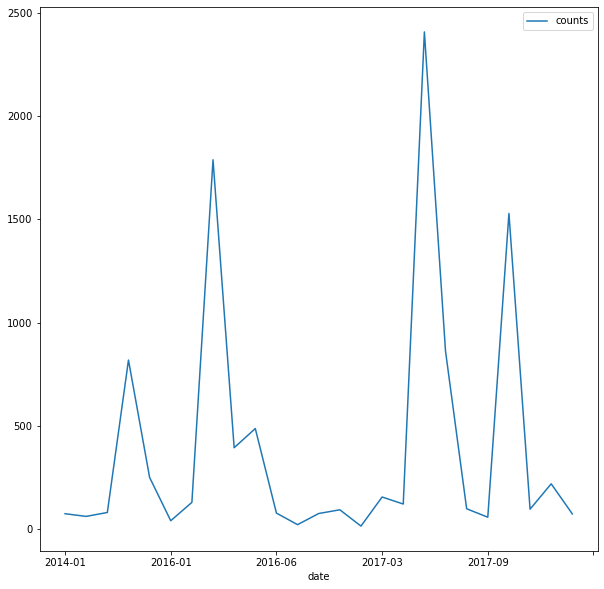

In [111]:
df_time_series.plot(x='date',y='counts', figsize=(10,10))

In [92]:
df_time_series.drop(columns=['date_modified'],inplace=True)

In [93]:
df_time_series

,date,counts
18,2014-01,73
20,2015-06,60
15,2015-07,79
4,2015-10,818
7,2015-11,249
22,2016-01,39
10,2016-02,128
1,2016-03,1789
6,2016-04,393
5,2016-05,486


In [60]:
df_1['dateAdded'].max()

'2018-05-12T05:33:10Z'

In [61]:
df_1['dateAdded'].min()

'2014-01-06T05:32:50Z'

In [25]:
type(df_1['date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [30]:
df_1['date'].max()

Timestamp('2018-06-29 15:04:53.224000')

In [31]:
df_1['date'].min()

Timestamp('2015-10-23 02:52:00')

In [ ]:
df_1['menus.dateSeen']

In [6]:
df_1['yearOpened'].value_counts()

2015.0    91
Name: yearOpened, dtype: int64

In [8]:
df_1['isClosed'].value_counts()

False    20
True     17
Name: isClosed, dtype: int64

In [7]:
df_1['claimed'].isna().any()

True

In [8]:
df_1.shape

(10000, 47)

In [9]:
df_1['country'].isna().any()

False

In [10]:
df_1['cuisines'].isna().any()

False

In [11]:
df_1['descriptions.dateSeen'].isna().any()

True

In [12]:
df_1['descriptions.dateSeen'].value_counts()

Series([], Name: descriptions.dateSeen, dtype: int64)

In [13]:
df_1['isClosed'].value_counts()

False    20
True     17
Name: isClosed, dtype: int64

In [14]:
df_1['isClosed'].isna().any()

True

In [15]:
df_1['languagesSpoken'].isna().any()

True

In [16]:
df_1['languagesSpoken'].value_counts()

Series([], Name: languagesSpoken, dtype: int64)

In [17]:
df_1['menus.category'].value_counts()

Beverages                    287
Appetizers                   262
Sides                        196
Desserts                     153
Salads                       127
                            ... 
Main Dishes  Rice Dishes       1
Enchanting Ensaladas           1
Spreads                        1
AUNT JAN39S SUNDAY BUFFET      1
Meat Entries                   1
Name: menus.category, Length: 818, dtype: int64

In [18]:
df_1['menus.category'].isna().any()

True

In [19]:
df_1['paymentTypes'].isna().any()

True

In [20]:
df_1['paymentTypes'].value_counts()

AMEX                                                                        367
American Express,Discover,Mastercard,Visa                                   267
American Express,Mastercard,Visa                                            225
Mastercard,Visa                                                             219
American Express,Debit Card,Discover,Mastercard                             217
Cash                                                                        216
amex                                                                        189
Visa,MasterCard                                                             179
Mastercard,Discover,Visa,American Express,Diners Club,diners club           168
Mastercard,Visa,American Express,Diners Club                                146
Mastercard,Discover,Visa,American Express                                   142
American Express,MasterCard                                                 135
Mastercard,Visa,American Express        

In [21]:
df_1['priceRangeCurrency'].value_counts()

USD    6327
Name: priceRangeCurrency, dtype: int64

In [22]:
df_1['sic'].value_counts()

5610.0    104
8129.0     20
4773.0     16
Name: sic, dtype: int64

In [23]:
df_1['yearOpened'].value_counts()

2015.0    91
Name: yearOpened, dtype: int64

In [24]:
df_1['categories']

0       Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...
1       Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...
2       Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...
3       Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...
4       Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...
                              ...                        
9995    Vegetarian / Vegan Restaurant,Restaurant,Medit...
9996    Vegetarian / Vegan Restaurant,Restaurant,Medit...
9997    Vegetarian / Vegan Restaurant,Restaurant,Medit...
9998    Vegetarian / Vegan Restaurant,Restaurant,Medit...
9999    Vegetarian / Vegan Restaurant,Restaurant,Medit...
Name: categories, Length: 10000, dtype: object

In [25]:
df_1.shape

(10000, 47)

In [26]:
df_1.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'claimed', 'country', 'cuisines',
       'descriptions.dateSeen', 'descriptions.sourceURLs',
       'descriptions.value', 'facebookPageURL', 'features.key',
       'features.value', 'hours.day', 'hours.dept', 'hours.hour', 'imageURLs',
       'isClosed', 'keys', 'languagesSpoken', 'latitude', 'longitude',
       'menuPageURL', 'menus.amountMax', 'menus.amountMin', 'menus.category',
       'menus.currency', 'menus.dateSeen', 'menus.description', 'menus.name',
       'menus.sourceURLs', 'name', 'paymentTypes', 'phones', 'postalCode',
       'priceRangeCurrency', 'priceRangeMin', 'priceRangeMax', 'province',
       'sic', 'sourceURLs', 'twitter', 'websites', 'yearOpened'],
      dtype='object')

#### For few columns everything is filled with NA. We will be removing those columns from our analysis

In [27]:
df_1.drop(columns=["descriptions.dateSeen","descriptions.sourceURLs","descriptions.value","features.key",
                  "features.value","hours.day","hours.dept","hours.hour","languagesSpoken","isClosed",
                   "yearOpened","sic","claimed","facebookPageURL","twitter"],inplace=True)

In [28]:
df_1.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'cuisines', 'imageURLs', 'keys',
       'latitude', 'longitude', 'menuPageURL', 'menus.amountMax',
       'menus.amountMin', 'menus.category', 'menus.currency', 'menus.dateSeen',
       'menus.description', 'menus.name', 'menus.sourceURLs', 'name',
       'paymentTypes', 'phones', 'postalCode', 'priceRangeCurrency',
       'priceRangeMin', 'priceRangeMax', 'province', 'sourceURLs', 'websites'],
      dtype='object')

In [29]:
df_1.head(n=10)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,cuisines,imageURLs,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.category,menus.currency,menus.dateSeen,menus.description,menus.name,menus.sourceURLs,name,paymentTypes,phones,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,sourceURLs,websites
0,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,US,"Thai,Asian/Pacific,Vegetarian",https://igx.4sqi.net/img/general/600x600/o_h1i...,us/ca/albany/1045sanpabloave/-1106202297,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,NaN,USD,2016-04-22T02:48:00.000Z,"Squash, carrots, butternut squash and potato",Baked Kabocha,https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,NaN,(510) 528-2375,94706,NaN,NaN,NaN,CA,https://foursquare.com/v/potala-organic-cafe/4...,"http://www.potala.us/,http://potala.us"
1,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,US,"Thai,Asian/Pacific,Vegetarian",https://igx.4sqi.net/img/general/600x600/o_h1i...,us/ca/albany/1045sanpabloave/-1106202297,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,NaN,USD,2016-04-22T02:48:00.000Z,With wild blend brown rice,Short Grain Brown Rice,https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,NaN,(510) 528-2375,94706,NaN,NaN,NaN,CA,https://foursquare.com/v/potala-organic-cafe/4...,"http://www.potala.us/,http://potala.us"
2,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,US,"Thai,Asian/Pacific,Vegetarian",https://igx.4sqi.net/img/general/600x600/o_h1i...,us/ca/albany/1045sanpabloave/-1106202297,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,NaN,USD,2016-04-22T02:48:00.000Z,NaN,Green Bean Veggie Soup,https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,NaN,(510) 528-2375,94706,NaN,NaN,NaN,CA,https://foursquare.com/v/potala-organic-cafe/4...,"http://www.potala.us/,http://potala.us"
3,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,US,"Thai,Asian/Pacific,Vegetarian",https://igx.4sqi.net/img/general/600x600/o_h1i...,us/ca/albany/1045sanpabloave/-1106202297,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,8.95,8.95,NaN,USD,2016-04-22T02:48:00.000Z,NaN,"Steamed Broccoli, Carrots and Turnips",https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,NaN,(510) 528-2375,94706,NaN,NaN,NaN,CA,https://foursquare.com/v/potala-organic-cafe/4...,"http://www.potala.us/,http://potala.us"
4,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,US,"Thai,Asian/Pacific,Vegetarian",https://igx.4sqi.net/img/general/600x600/o_h1i...,us/ca/albany/1045sanpabloave/-1106202297,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,NaN,USD,2016-04-22T02:48:00.000Z,With vinegar tahini beet dressing,Mixed Green Salad,https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,NaN,(510) 528-2375,94706,NaN,NaN,NaN,CA,https://foursquare.com/v/potala-organic-cafe/4...,"http://www.potala.us/,http://potala.us"
5,AVwddQkGkufWRAb56GvX,2016-03-24T10:25:20Z,2018-09-04T13:02:10Z,16411 Bernardo Center Dr,"Indian Restaurant,Restaurant,Caterers,Food Din...",Accommodation & Food Services,San Diego,US,"Vegetarian,Indian",https://irs3.4sqi.net/img/general/200x200/2099...,us/ca/sandiego/16411bernardocenterdr/1998744718,33.012662,-117.078

In [30]:
df_1.fillna("Not Available",inplace=True)

In [31]:
df_1.sample(n=10)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,cuisines,imageURLs,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.category,menus.currency,menus.dateSeen,menus.description,menus.name,menus.sourceURLs,name,paymentTypes,phones,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,sourceURLs,websites
5099,AV1Tso0J-gnIPe8DWscT,2017-07-18T03:16:36Z,2018-07-01T12:33:30Z,3827 N Lincoln Ave,"Restaurant,Breakfast & Brunch,Coffeehouses,Res...",Accommodation & Food Services,Chicago,US,"Traditional American,Vegan,Breakfast and Brunc...",https://media-cdn.tripadvisor.com/media/photo-...,us/il/chicago/3827nlincolnave/-424695994,41.951325,-87.676736,http://www.singlepage.com/delicious-cafe,2.50,2.50,Coffee,USD,"2018-05-20T09:29:53.344Z,2018-05-04T13:18:48.4...",Not Available,Americano,https://www.allmenus.com/il/chicago/285047-del...,Delicious Cafe,"Mastercard,Discover,Visa,American Express",(773) 477-9840,60613,Not Available,Not Available,Not Available,IL,https://www.allmenus.com/il/chicago/285047-del...,http://www.adeliciousvegancafe.com/
5603,AVwc3k4JByjofQCxjEfY,2016-03-27T05:39:16Z,2018-06-30T09:18:55Z,2531 Chain Bridge Rd,"Asian Restaurants,Restaurant,Chinese Restauran...",Accommodation & Food Services,Vienna,US,"Vegetarian,Vegetarian Restaurants",http://storage.googleapis.com/zgt-photos/0x89b...,us/va/vienna/2531chainbridgerd/688384642,38.892958,-77.275703,http://www.citysearch.com/profile/menu/1047355...,12.50,12.50,Sunflower Specialties,USD,"2018-04-08T13:39:49.120Z,2018-05-04T10:37:03.8...",fresh enoki mushroomsampcomma white mushroomsa...,Amazing Mushrooms Palate,https://www.allmenus.com/va/vienna/297323-sunf...,Sunflower Vegetarian Restaurant,amex,(703) 319-3888,22181,USD,0.0,25.0,VA,https://foursquare.com/v/sunflower-vegetarian-...,"http://www.crystalsunflower.com,http://api.cit..."
4187,AV8wURBz3-Khe5l_YO1B,2017-10-18T16:27:41Z,2018-07-19T09:43:40Z,1395 Lexington Ave,"Mediterranean,Restaurant,Vegetarian,Coffee and...",Accommodation & Food Services,New York,US,"Mediterranean,Vegetarian,Coffee and Tea,Kosher",Not Available,us/ny/newyork/1395lexingtonave/-910163161,40.782752,-73.952907,http://www.menupages.com/restaurants/effys-isr...,5.95,5.95,Not Available,USD,"2018-07-16T03:08:47.721Z,2017-10-19T14:31:00.0...",Not Available,Hummus Sandwich,http://www.menupages.com/restaurants/effys-isr...,Effy's Israeli Cafe,Not Available,(212) 415-5552,10128,Not Available,Not Available,Not Available,NY,http://www.menupages.com/restaurants/effys-isr...,Not Available
5655,AVwc3k4JByjofQCxjEfY,2016-03-27T05:39:16Z,2018-06-30T09:18:55Z,2531 Chain Bridge Rd,"Asian Restaurants,Restaurant,Chinese Restauran...",Accommodation & Food Services,Vienna,US,"Vegetarian,Vegetarian Restaurants",http://storage.googleapis.com/zgt-photos/0x89b...,us/va/vienna/2531chainbridgerd/688384642,38.892958,-77.275703,http://www.citysearch.com/profile/menu/1047355...,3.00,3.00,Beverages,USD,"2018-04-08T13:39:49.120Z,2018-05-14T18:25:02.5...",Not Available,Organic Soy Extra Vanilla Milk,https://www.allmenus.com/va/vienna/297323-sunf...,Sunflower Vegetarian Restaurant,amex,(703) 319-3888,22181,USD,0.0,25.0,VA,https://foursquare.com/v/sunflower-vegetarian-...,"http://www.crystalsunflower.com,http://api.cit..."
9961,AVwd88lK_7pvs4fz-toI,2016-03-28T05:35:40Z,2018-01-09T08:01:08Z,1335 W Thomas Rd,"Vegetarian / Vegan Restaurant,Restaurant,Medit...",Accommodation & Food Services,Phoenix,US,"Mediterranean,Vegetarian,Persian,Middle Eastern",https://cdn1.gbot.me/photos/6D/oK/1475183225/-...,us/az/phoenix/1335wthomasrd/-1848873742,33.480480,-112.090640,http://www.singlepage.com/persian-garden-cafe,5.00,5.00,Not Available,USD,"2017-12-17T23:32:00.000Z,2016-03-28T05:36:00.000Z",Not Available,House Season Salad,https://foursquare.com/v/persian-garden-cafe/4...,Persian Garden Cafe,Not Available,(602) 263-1915,85013,USD,40.0,55.0,AZ,https://foursquare.com/v/persian-garden-cafe/4...,"http://persiangardencafe.com,http://www.pe

### We can check the popularity of vegetarian cusines based on postal code!

In [32]:
df_1['postalCode'].nunique()

146

#### Counting the number of vegetarian cuisines for each restuaran

In [33]:
df_1['primaryCategories'].nunique()

6

#### Some analysis around Primary Categories as well!

In [33]:
df_1['categories'].nunique()

166

In [34]:
df_1['cuisines'].nunique()

149

In [35]:
df_1['cuisines'] = df_1['cuisines'].apply(lambda x:x.lower())

In [36]:
df_1['categories'] = df_1['categories'].apply(lambda x:x.lower())

In [37]:
df_1['cuisines'].unique()

array(['thai,asian/pacific,vegetarian', 'vegetarian,indian',
       'smoothies and juices,vegetarian,healthy',
       'local/organic,vegan restaurants,smoothies and juices,vegetarian,healthy',
       'seafood,italian,vegetarian,deli and sandwich',
       'sushi,kosher,vegan', 'desserts,bakery and pastries,vegan',
       'american (new),vegetarian,coffee and tea,health food,vegan',
       'vegetarian,coffee and tea,bakery,desserts,bakery and pastries,vegan',
       'local/organic,vegetarian,coffee and tea,healthy,vegan',
       'vegetarian,dim sum,chinese', 'vegetarian,coffee and tea',
       'vegetarian,sandwiches', 'vegetarian,greek',
       'southeast asian,vegetarian,korean', 'vegetarian,thai',
       'vegetarian,salads', 'vegetarian,chinese',
       'vegetarian,kosher,sandwiches,kosher, vegetarian-friendly, sandwiches',
       'british (modern),vegetarian', 'deli food,vegetarian,indian',
       'middle eastern,vegetarian',
       'vegetarian,indian, vegetarian-friendly,indian',
   

In [38]:
pattern = '[a-z]+'

In [39]:
df_1['cuisines_list'] = df_1['cuisines'].apply(lambda x: x.split(','))

In [40]:
df_1['categories'] = df_1['categories'].apply(lambda x:x.split(','))

In [41]:
df_1['cuisines_list'][0]

['thai', 'asian/pacific', 'vegetarian']

In [42]:
df_1['categories'][0]

['restaurant',
 'asian/pacific',
 'cafe',
 'vegetarian / vegan restaurant',
 'vegetarian',
 'vegetarian vegan restaurant',
 'caf',
 'thai']

In [43]:
df_grby_city = df_1.groupby('city').agg(lambda cuisines_list:cuisines_list.tolist())

In [44]:
df_grby_city.shape

(81, 32)

In [45]:
def flatten(t):
    return [item for sublist in t for item in sublist]

In [46]:
df_grby_city['cuisines_list'] = df_grby_city['cuisines_list'].apply(lambda x:flatten(x))

In [47]:
df_grby_city['categories'] = df_grby_city['categories'].apply(lambda x:flatten(x))

In [48]:
df_grby_city['cuisines_list'][0]

['thai',
 'asian/pacific',
 'vegetarian',
 'thai',
 'asian/pacific',
 'vegetarian',
 'thai',
 'asian/pacific',
 'vegetarian',
 'thai',
 'asian/pacific',
 'vegetarian',
 'thai',
 'asian/pacific',
 'vegetarian']

In [49]:
df_grby_city['categories'][0]

['restaurant',
 'asian/pacific',
 'cafe',
 'vegetarian / vegan restaurant',
 'vegetarian',
 'vegetarian vegan restaurant',
 'caf',
 'thai',
 'restaurant',
 'asian/pacific',
 'cafe',
 'vegetarian / vegan restaurant',
 'vegetarian',
 'vegetarian vegan restaurant',
 'caf',
 'thai',
 'restaurant',
 'asian/pacific',
 'cafe',
 'vegetarian / vegan restaurant',
 'vegetarian',
 'vegetarian vegan restaurant',
 'caf',
 'thai',
 'restaurant',
 'asian/pacific',
 'cafe',
 'vegetarian / vegan restaurant',
 'vegetarian',
 'vegetarian vegan restaurant',
 'caf',
 'thai',
 'restaurant',
 'asian/pacific',
 'cafe',
 'vegetarian / vegan restaurant',
 'vegetarian',
 'vegetarian vegan restaurant',
 'caf',
 'thai']

In [50]:
def most_frequent(List):
    return max(set(List), key=List.count)

In [51]:
df_grby_city['most_common_cuisine'] = df_grby_city['cuisines_list'].apply(lambda x:most_frequent(x))

In [52]:
df_grby_city['most_common_category'] = df_grby_city['categories'].apply(lambda x:most_frequent(x))

In [53]:
df_grby_city['most_common_category']

city
Albany                                  caf
Arlington                health food stores
Asbury Park              breakfast & brunch
Astoria                          vegetarian
Atlanta                            american
                             ...           
Waltham                         restaurants
Warren                          restaurants
Wellesley Hills                 restaurants
Westmont           family style restaurants
Woodside                         restaurant
Name: most_common_category, Length: 81, dtype: object

In [54]:
df_grby_city['categories'][0]

['restaurant',
 'asian/pacific',
 'cafe',
 'vegetarian / vegan restaurant',
 'vegetarian',
 'vegetarian vegan restaurant',
 'caf',
 'thai',
 'restaurant',
 'asian/pacific',
 'cafe',
 'vegetarian / vegan restaurant',
 'vegetarian',
 'vegetarian vegan restaurant',
 'caf',
 'thai',
 'restaurant',
 'asian/pacific',
 'cafe',
 'vegetarian / vegan restaurant',
 'vegetarian',
 'vegetarian vegan restaurant',
 'caf',
 'thai',
 'restaurant',
 'asian/pacific',
 'cafe',
 'vegetarian / vegan restaurant',
 'vegetarian',
 'vegetarian vegan restaurant',
 'caf',
 'thai',
 'restaurant',
 'asian/pacific',
 'cafe',
 'vegetarian / vegan restaurant',
 'vegetarian',
 'vegetarian vegan restaurant',
 'caf',
 'thai']

In [55]:
df_grby_city

,id,dateAdded,dateUpdated,address,categories,primaryCategories,country,cuisines,imageURLs,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.category,menus.currency,menus.dateSeen,menus.description,menus.name,menus.sourceURLs,name,paymentTypes,phones,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,sourceURLs,websites,cuisines_list,most_common_cuisine,most_common_category
city,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albany,"[AVwd3yXEkufWRAb59-sH, AVwd3yXEkufWRAb59-sH, A...","[2016-04-22T02:47:48Z, 2016-04-22T02:47:48Z, 2...","[2018-09-10T21:00:49Z, 2018-09-10T21:00:49Z, 2...","[1045 San Pablo Ave, 1045 San Pablo Ave, 1045 ...","[restaurant, asian/pacific, cafe, vegetarian /...","[Accommodation & Food Services, Accommodation ...","[US, US, US, US, US]","[thai,asian/pacific,vegetarian, thai,asian/pac...",[https://igx.4sqi.net/img/general/600x600/o_h1...,"[us/ca/albany/1045sanpabloave/-1106202297, us/...","[37.885131, 37.885131, 37.885131, 37.885131, 3...","[-122.297013, -122.297013, -122.297013, -122.2...",[http://www.singlepage.com/ruen-pair-authentic...,"[13.95, 13.95, 13.95, 8.95, 13.95]","[3.75, 3.75, 3.75, 8.95, 3.75]","[Not Available, Not Available, Not Available, ...","[USD, USD, USD, USD, USD]","[2016-04-22T02:48:00.000Z, 2016-04-22T02:48:00...","[Squash, carrots, butternut squash and potato,...","[Baked Kabocha, Short Grain Brown Rice, Green ...",[https://foursquare.com/v/potala-organic-cafe/...,"[Potala Organic Cafe, Potala Organic Cafe, Pot...","[Not Available, Not Available, Not Available, ...","[(510) 528-2375, (510) 528-2375, (510) 528-237...","[94706, 94706, 94706, 94706, 94706]","[Not Available, Not Available, Not Available, ...","[Not Available, Not Available, Not Available, ...","[Not Available, Not Available, Not Available, ...","[CA, CA, CA, CA, CA]",[https://foursquare.com/v/potala-organic-cafe/...,"[http://www.potala.us/,http://potala.us, http:...","[thai, asian/pacific, vegetarian, thai, asian/...",vegetarian,caf
Arlington,"[AVwc7UHJkufWRAb50gE-, AVwc7UHJkufWRAb50gE-, A...","[2016-06-08T16:13:30Z, 2016-06-08T16:13:30Z, 2...","[2018-05-28T16:15:12Z, 2018-05-28T16:15:12Z, 2...","[1681 Crystal Square Arc, 1681 Crystal Square ...","[restaurant, health food stores, greek restaur...","[Accommodation & Food Services, Accommodation ...","[US, US, US, US, US, US, US, US, US, US, US, U...","[mediterranean restaurants,greek restaurants,r...",[https://i1.ypcdn.com/ypu/images/default-thumb...,[us/va/arlington/1681crystalsquarearc/21069464...,"[38.858192, 38.858192, 38.858192, 38.858192, 3...","[-77.051507, -77.051507, -77.051507, -77.05150...",[http://www.citysearch.com/profile/menu/379728...,"[6.49, 2.29, 1.29, 5.99, 5.29, 2.69, 5.99, 5.4...","[6.49, 0.79, 1.29, 5.99, 5.29, 2.69, 5.99, 5.4...","[Not Available, Not Available, Not Available, ...","[USD, USD, USD, USD, USD, USD, USD, USD, USD, ...","[2017-12-19T22:27:00.000Z,2017-10-28T23:23:00....","[Not Available, Not Available, Not Available, ...","[Stromboli, Desserts, Fresh Baked Muffins, Fal...",[https://foursquare.com/v/the-perfect-pita/4da...,"[The Perfect Pita, The Perfect Pita, The Perfe...","[discover,amex, discover,amex, discover,amex, ...","[(703) 418-6656, (703) 418-6656, (703) 418-665...","[22202, 22202, 22202, 22202, 22202, 22202, 222...","[USD, USD, USD, USD, USD, USD, USD, USD, USD, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25....","[VA, VA, VA, VA, VA, VA, VA, VA, VA, VA, VA, V...",[https://foursquare.com/v/the-perfect-pita/4da...,"[http://www.theperfectpita.com,http://api.city...","[mediterranean restaurants, greek restaurants,...",greek,health food stores
Asbury Park,"[AV1TsD-u-gnIPe8DWqIB, AV1TsD-u-gnIPe8DWqIB, A...","[2017-07-18T03:14:05Z, 2017-07-18T03:14:05Z, 2...","[2018-06-01T23:52:39Z, 2018-06-01T23:52:39Z, 2...","[311 Bond St, 311 Bond St, 311 Bond St, 311 Bo...","[natural food restaurants, southern / soul, ca...","[Accommodation & Food Services, Acc

In [56]:
df_grby_city.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'country', 'cuisines', 'imageURLs', 'keys',
       'latitude', 'longitude', 'menuPageURL', 'menus.amountMax',
       'menus.amountMin', 'menus.category', 'menus.currency', 'menus.dateSeen',
       'menus.description', 'menus.name', 'menus.sourceURLs', 'name',
       'paymentTypes', 'phones', 'postalCode', 'priceRangeCurrency',
       'priceRangeMin', 'priceRangeMax', 'province', 'sourceURLs', 'websites',
       'cuisines_list', 'most_common_cuisine', 'most_common_category'],
      dtype='object')

In [57]:
df_grby_city.reset_index(inplace=True)

In [58]:
df_modified = df_grby_city[['city','categories','cuisines','cuisines_list','most_common_cuisine','most_common_category']]

In [59]:
df_modified.shape

(81, 6)

In [60]:
df_modified

,city,categories,cuisines,cuisines_list,most_common_cuisine,most_common_category
0,Albany,"[restaurant, asian/pacific, cafe, vegetarian /...","[thai,asian/pacific,vegetarian, thai,asian/pac...","[thai, asian/pacific, vegetarian, thai, asian/...",vegetarian,caf
1,Arlington,"[restaurant, health food stores, greek restaur...","[mediterranean restaurants,greek restaurants,r...","[mediterranean restaurants, greek restaurants,...",greek,health food stores
2,Asbury Park,"[natural food restaurants, southern / soul, ca...","[southern / soul,vegetarian,breakfast and brun...","[southern / soul, vegetarian, breakfast and br...",breakfast and brunch,breakfast & brunch
3,Astoria,"[mediterranean restaurant, middle eastern, veg...","[middle eastern,vegetarian,sandwiches, middle ...","[middle eastern, vegetarian, sandwiches, middl...",vegetarian,vegetarian
4,Atlanta,"[restaurant, american, vegetarian, restaurant,...","[american,vegetarian, american,vegetarian, ame...","[american, vegetarian, american, vegetarian, a...",american,american
...,...,...,...,...,...,...
76,Waltham,"[restaurant, restaurants]","[italian,vegetarian]","[italian, vegetarian]",vegetarian,restaurants
77,Warren,"[mediterranean restaurant, restaurant, restaur...","[mediterranean,mediterranean restaurants,middl...","[mediterranean, mediterranean restaurants, mid...",greek,restaurants
78,Wellesley Hills,"[restaurant, thai restaurant, restaurants, res...","[vegetarian,thai, vegetarian,thai, vegetarian,...","[vegetarian, thai, vegetarian, thai, vegetaria...",vegetarian,restaurants
79,Westmont,"[asian restaurants, restaurant, family style r...","[vegetarian,indian,vegetarian restaurants, veg...","[vegetarian, indian, vegetarian restaurants, v...",vegetarian,family style restaurants


In [61]:
df_modified.to_csv('cleaned_cuisines_and_categories.csv',index=False)

In [63]:
df_grby_city['cuisines_list'][0]

['thai,asian/pacific,vegetarian',
 'thai,asian/pacific,vegetarian',
 'thai,asian/pacific,vegetarian',
 'thai,asian/pacific,vegetarian',
 'thai,asian/pacific,vegetarian']

In [24]:
df_2 = pd.read_csv('../data/vegetarian_restaurants_US_datafiniti.csv')

In [25]:
df_2.shape

(18155, 29)

In [26]:
df_2.head(n=10)

,address,categories,city,claimed,country,cuisines,dateOpened,dateUpdated,descriptions,facebookPageURL,features,hours,images,isClosed,key,lat,languages,long,menus,menuURL,name,paymentTypes,phones,postalCode,priceRange,province,sic,twitter,websites
0,2871 Gulf To Bay Blvd,"American, American (new), Clearwater Restauran...",Clearwater,NaN,US,NaN,NaN,2014-02-01T04:41:06Z,"Tags: American (New), American, and Trendy Sta...",NaN,NaN,NaN,NaN,NaN,us/fl/clearwater/2871gulftobayblvd,27.971165,NaN,-82.696938,"[{""descriptions"":""A combination of diced ham a...",NaN,Village Inn Restaurant and Bakery,NaN,7277964988,33759,NaN,FL,8423,NaN,NaN
1,605 W Main St,Caf and Sandwich Place,Louisville,NaN,US,"Vegetarian, Delicatessen",NaN,2016-07-23T22:37:24Z,"Atlantic No. 5, Louisville: See 4 unbiased rev...",NaN,"[{""key"":""Value Rating"",""value"":""3.5 of 5 stars...","[{""day"":""Mon - Fri"",""hour"":""7:00 AM - 4:00 PM""...",https://irs2.4sqi.net/img/general/200x200/2973...,NaN,us/ky/louisville/605wmainst,38.257020,NaN,-85.760013,"[{""descriptions"":""Mexican coke, ale 8, q soda,...",NaN,Atlantic No. 5,Yes,5028833398,40202,USD 25.00-40.00,KY,NaN,NaN,atlanticno5.com
2,3803 9th St S W,"American, Barbecue, Puyallup Restaurants, Barb...",Puyallup,NaN,US,NaN,NaN,2015-11-19T22:22:31Z,"Description: Famous Dave's is a Barbecue , Am...",NaN,NaN,NaN,NaN,NaN,us/wa/puyallup/38039thstsw/98451436,47.154828,NaN,-122.303992,"[{""descriptions"":""create your own full slab. p...",NaN,Famous Dave's,NaN,2536040340,98373,USD 10.00 - USD 15.00,WA,5610,NaN,http://famousdaves.com
3,30 S Main St,"Coffee & Tea, Restaurant, Restaurants, Bar, Am...",Oberlin,NaN,US,"Coffee & Tea, Restaurants, American, Bar, Pu...",NaN,2016-06-20T17:47:10Z,"The Feve, Oberlin: See 170 unbiased reviews of...",NaN,"[{""key"":""AKA:"",""value"":""Feve The""},{""key"":""Val...","[{""day"":""Sat - Sun"",""hour"":""9:30 am - 2:30 am""...",https://irs1.4sqi.net/img/general/200x200/1541...,NaN,us/oh/oberlin/30smainst,41.290823,NaN,-82.217640,NaN,/oberlin-oh/mip/the-feve-8940755/menu,The Feve,"mastercard, amex, discover, Yes, visa","[""4407741978"",""4197741978"",""4407753064""]",44074,USD 25.00-40.00,OH,NaN,NaN,http://www.thefeve.com
4,55 Crescent Dr,Sandwich Place and Fast Food Restaurant,Pleasant Hill,yellowpages.com,US,"Take Out Restaurants, Asian Restaurants, Resta...",NaN,2016-07-23T23:55:05Z,"[""https://www.zagat.com/r/yalla-mediterranean-...",NaN,"[{""key"":""Price Range "",""value"":""Below Average""}]","[{""day"":""Monday "",""hour"":""11:00am - 9:00pm ""},...",http://storage.googleapis.com/zgt-photos/0x808...,NaN,us/ca/pleasanthill/55crescentdr,37.945663,NaN,-122.061997,"[{""descriptions"":""greek salad and rice pilaf t...",/pleasant-hill-ca/mip/yalla-mediterranean-5061...,Quiznos,"master card, visa",9258258644,94523,$,CA,NaN,quiznos,http://www.yallamedi.com/
5,2243 Richmond Ave,"English Restaurant, Caf, and Breakfast Spot",Houston,NaN,US,"Coffee Shops, American Restaurants, Restaurant...",NaN,2016-07-23T23:24:12Z,"[""https://www.zagat.com/r/hobbit-cafe-houston""]",NaN,"[{""key"":""Other Information"",""value"":""Parking: ...","[{""day"":""Mon–Thu"",""hour"":""11:00 AM–9:30 PM""},{...",https://irs0.4sqi.net/img/general/200x200/7108...,NaN,us/tx/houston/2243richmondave,29.733600,NaN,-95.414600,"[{""descriptions"":[""Spring mix with fresh and t...",/houston-tx/mip/hobbit-cafe-22358589/menu,Hobbit Cafe,"check, discover, cash, amex, all major credit ...","[""7135265460""]","[""77098""]",USD 25.00-40.00,TX,NaN,cafehobbit,http://www.myhobbitcafe.com/
6,8007 State Rt 31,"Pizza, Restaurants",Bridgeport,NaN,US,"New York Style Pizza, Pizza By The Slice, Home...",2011-01-01T12:00:00Z,2015-11-19T22:21:54Z,Check Out Our Full Menu At: www.myfamiliapizza...,NaN,NaN,NaN,NaN,NaN,us/ny/bridgeport/8007statert31,NaN,NaN,NaN,NaN,NaN,Familia Pizza,NaN,3156339909,13030,NaN,NY,5610,NaN,http://www.myfamiliapizza.com
7,415 Thompson Ln,"Nashville Restaurants, Glencliff Estates, Rest...",Nashville,NaN,US,"African, Eth

In [27]:
df_2['country'].unique()

array(['US'], dtype=object)

In [28]:
df_2['claimed'].unique()

array([nan, 'yellowpages.com', 'foursquare.com',
       'foursquare.com, yellowpages.com',
       'yellowpages.com, foursquare.com', 'homestars.com',
       'insiderpages.com'], dtype=object)

#### Use this data for missing values

In [29]:
df_2['priceRange'].value_counts()

$$                      1827
USD 25.00-40.00         1417
$                       1150
USD 0.00-25.00           757
USD 0.00 - USD 30.00     505
                        ... 
USD 7 - USD 29             1
USD 8 - USD 24             1
USD 2 - USD 20             1
USD 3 - USD 18             1
USD 18 - USD 35            1
Name: priceRange, Length: 151, dtype: int64

In [30]:
df_2['claimed'].value_counts()

yellowpages.com                    596
foursquare.com                     212
foursquare.com, yellowpages.com      4
yellowpages.com, foursquare.com      4
insiderpages.com                     3
homestars.com                        1
Name: claimed, dtype: int64

In [ ]:
df_2

#### reading the next data frame

In [34]:
df_3, meta = pyreadstat.read_sav("../data/Faunalytics-Current-Former-Veg-Study-Dataset-All-Respondents-Original-Variables.sav")

In [35]:
df_3.sample(n=10)

,id,token,submitdate,startlanguage,startdate,datestamp,ALL_1_1,ALL_1_2,ALL_1_3,ALL_1_4,ALL_1_5,ALL_1_6,ALL_1_7,ALL_1_8,ALL_1_9,ALL_1_10,ALL_1_11,ALL_1_13,ALL_1_14,ALL_1_15,ALL_1_16,ALL_1_17,ALL_1_18,ALL_1_19,OMNIVORES_1,OMNIVORES_2,UNVER_VEGN_REC_3,UNVER_VEG_REC_4_1,UNVER_VEG_REC_4_2,UNVER_VEG_REC_4_3,UNVER_VEG_REC_4_4,UNVER_VEG_REC_4_5,UNVER_VEG_REC_4_6,UNVER_VEG_REC_4_7,UNVER_VEG_REC_4_8,UNVER_VEG_REC_4_9,UNVER_VEG_REC_4_10,UNVER_VEG_REC_4_11,UNVER_VEG_REC_4_13,UNVER_VEG_REC_4_14,UNVER_VEG_REC_4_15,UNVER_VEG_REC_4_16,UNVER_VEG_REC_4_17,UNVER_VEG_REC_4_18,UNVER_VEG_REC_4_19,UNVER_VEGAN_REC_4_1,UNVER_VEGAN_REC_4_2,UNVER_VEGAN_REC_4_3,UNVER_VEGAN_REC_4_4,UNVER_VEGAN_REC_4_5,...,VEG_1_8,VEG_1_9,VEG_1_10,VEG_1_11,VEG_1_12,VEG_1_13,VEG_1_14,VEG_1_15,VEGAN_1_1,VEGAN_1_2,VEGAN_1_3,VEGAN_1_4,VEGAN_1_5,VEGAN_1_6,VEGAN_1_7,VEGAN_1_8,VEGAN_1_9,VEGAN_1_10,VEGAN_1_11,VEGAN_1_12,VEGAN_1_13,V460,V461,VEG_2_SQ001,VEG_2_SQ002,VEG_2_SQ003,VEG_2_SQ004,VEG_2_SQ005,VEG_2_SQ006,VEG_2_SQ007,VEG_2_SQ008,VEG_2_SQ009,VEG_2_SQ010,VEGAN_2_SQ001,VEGAN_2_SQ002,VEGAN_2_SQ003,VEGAN_2_SQ004,VEGAN_2_SQ005,VEGAN_2_SQ006,VEGAN_2_SQ007,VEGAN_2_SQ008,VEGAN_2_SQ009,VEGAN_2_SQ010,ALL_1,ALL_2,ALL_3,ALL_4,ALL_5,ALL_6,ALL_7
10990,11920.0,,NaT,en,2014-05-17 10:19:29,2014-05-17 10:20:08,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,,NaN,,,NaN,NaN
6971,7547.0,,NaT,en,2014-05-13 12:07:40,2014-05-13 12:09:09,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,,NaN,,,NaN,NaN
6145,6662.0,,NaT,en,2014-05-12 10:10:16,2014-05-12 10:10:41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,,NaN,,,NaN,NaN
4628,5039.0,,NaT,en,2014-05-10 08:02:54,2014-05-10 08:04:19,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,,NaN,,,NaN,NaN
1650,1839.0,,NaT,en,2014-05-08 11:51:47,2014-05-08 11:53:07,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,,NaN,,,NaN,NaN
5828,6320.0,,NaT,en,2014-05-12 09:10:57,2014-05-12 09:12:25,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,,NaN,,,NaN,NaN
773,884.0,,NaT,en,2014-05-07 18:13:48,2014-05-07 18:32:56,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,,NaN,,,NaN,NaN
1849,2049.0,,2014-05-08 12:52:47,en,2014-05-08 12:50:11,2014-05-08 12:52:47,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.

In [36]:
meta

In [37]:
df_1.sample(n=10)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,claimed,country,cuisines,descriptions.dateSeen,descriptions.sourceURLs,descriptions.value,facebookPageURL,features.key,features.value,hours.day,hours.dept,hours.hour,imageURLs,isClosed,keys,languagesSpoken,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.category,menus.currency,menus.dateSeen,menus.description,menus.name,menus.sourceURLs,name,paymentTypes,phones,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,sic,sourceURLs,twitter,websites,yearOpened
4198,AV8wURBz3-Khe5l_YO1B,2017-10-18T16:27:41Z,2018-07-19T09:43:40Z,1395 Lexington Ave,"Mediterranean,Restaurant,Vegetarian,Coffee and...",Accommodation & Food Services,New York,NaN,US,"Mediterranean,Vegetarian,Coffee and Tea,Kosher",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,us/ny/newyork/1395lexingtonave/-910163161,NaN,40.782752,-73.952907,http://www.menupages.com/restaurants/effys-isr...,2.00,2.00,NaN,USD,"2017-10-19T14:31:00.000Z,2017-11-27T09:44:00.0...",NaN,Snapple,http://www.menupages.com/restaurants/effys-isr...,Effy's Israeli Cafe,NaN,(212) 415-5552,10128,NaN,NaN,NaN,NY,NaN,http://www.menupages.com/restaurants/effys-isr...,NaN,NaN,NaN
2258,AV8wU3vyIxWefVJwrRJM,2017-10-18T16:27:40Z,2018-07-19T21:03:55Z,413 Amsterdam Ave,"Restaurant,Vegetarian,Indian",Accommodation & Food Services,New York,NaN,US,"Vegetarian,Indian",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,us/ny/newyork/413amsterdamave/244936590,NaN,40.783649,-73.977937,http://www.menupages.com/restaurants/saravanaa...,13.49,13.49,Dosa Corner,USD,"2018-04-14T02:02:15.215Z,2018-04-16T04:39:41.950Z",Red chili chutney spread on thin rice and lent...,Mysore Onion Masala Dosa,https://www.allmenus.com/ny/new-york/301435-sa...,Saravanaa Bhavan,NaN,(212) 721-7755,10024,NaN,NaN,NaN,NY,NaN,http://www.menupages.com/restaurants/saravanaa...,NaN,NaN,NaN
7845,AVwdkgt9kufWRAb57MLk,2016-01-12T23:23:53Z,2018-05-20T14:04:10Z,1515 S 4th St,"Coffee Shop,Delicatessens,Vegetarian / Vegan R...",Accommodation & Food Services,Philadelphia,yellowpages.com,US,"Coffee Shops,Delicatessens,Coffee and Espresso...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://i1.ypcdn.com/ypu/images/default-thumbn...,NaN,us/pa/philadelphia/1515s4thst/1196284493,NaN,39.929111,-75.151957,http://www.singlepage.com/grindcore-house,4.00,4.00,Drinks,USD,2018-05-11T18:03:02.232Z,NaN,GTampaposs Synergy Kombucha,https://www.allmenus.com/pa/philadelphia/36063...,Grindcore House,"amex,visa",(215) 839-3333,19147,USD,25.0,40.0,PA,NaN,https://www.trip.com/philadelphia/restaurants/...,grindcorehouse,"http://www.grindcorehouse.com,http://www.faceb...",NaN
4103,AVweZHSikufWRAb5CgtN,2015-11-02T17:36:57Z,2018-07-19T09:44:23Z,1376 Lexington Ave,"Pizza,Falafel Restaurant,Restaurant,Middle Eas...",Accommodation & Food Services,New York,NaN,US,"Pizza,Middle Eastern,Vegetarian,Salads,Kosher",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://irs2.4sqi.net/img/general/200x200/6634...,NaN,us/ny/newyork/1376lexingtonave/-2064339646,NaN,40.782644,-73.953488,http://www.menupages.com/restaurants/sabas-piz...,2.99,2.99,NaN,USD,"2018-06-02T15:12:05.085Z,2017-12-17T09:01:24.9...",NaN,Classic Cheese Slice,http://www.menupages.com/restaurants/sabas-piz...,Saba's Pizza,NaN,(212) 987-9130,10128,USD,0.0,25.0,NY,NaN,http://www.menupages.com/restaurants/sabas-piz...,NaN,https://sabaspizzanyc.com,NaN
3139,AVwc1YGZkufWRAb5zgwb,2016-03-26T04:33:33Z,2018-07-19T20:53:50Z,659 Washington Ave,"Restaurant,Sushi Restaurant,Vegetarian,Sushi,J...",Accommodation & Food Services,Brooklyn,NaN,US,"Vegetarian,Sushi,Japanese",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://irs3.4sqi.net/img/general/200x200/4486...,NaN,us/ny/brooklyn/659washingtonave/102224,NaN,40.677572,-73.963703,http://www.menupages.com/restaurants/gen/menu,9.00,9.00,NaN,USD,"2016-03-26T04:33:33Z,2016-05-15T21:50:52Z",NaN,Vegetable Tempura Udon or Soba,https://foursquare.com/v/gen/49f50c9ff964a5208...,Gen,NaN,(718) 398-3550,11238,USD,25.0,40.0,NY,NaN,https://fou

In [38]:
df_2.sample(n=10)

,address,categories,city,claimed,country,cuisines,dateOpened,dateUpdated,descriptions,facebookPageURL,features,hours,images,isClosed,key,lat,languages,long,menus,menuURL,name,paymentTypes,phones,postalCode,priceRange,province,sic,twitter,websites
9829,1451 O St,"Salad Place, Vegetarian / Vegan Restaurant, an...",Lincoln,NaN,US,NaN,NaN,2016-08-18T22:04:49Z,NaN,NaN,NaN,"[{""day"":""Mon���Wed"",""hour"":""11:00 AM���7:00 PM...",NaN,NaN,us/ne/lincoln/1451ost,NaN,NaN,NaN,"[{""descriptions"":"". "",""name"":""Mandarin Oranges...",NaN,"Grateful Greens, Abloom",Yes (incl. Discover & MasterCard),"[""4022618388""]",68508,USD 0.00-25.00,NE,NaN,", gratefulgreens",NaN
10969,316 E Judge Perez Dr,Restaurant,Chalmette,NaN,US,"Pizza, Vegetarian",NaN,2016-03-23T04:22:16Z,"Domino's Pizza, Chalmette: See unbiased review...",NaN,NaN,"[{""day"":""Saturday"",""hour"":""10:00 am - 1:00 am""}]",https://static.tacdn.com/img2/x.gif,NaN,us/la/chalmette/316ejudgeperezdr/-1055723171,29.941296,NaN,-89.960940,NaN,NaN,Domino's Pizza,NaN,5042793010,70043,NaN,LA,NaN,NaN,http://www.dominos.com
7604,Village On High,"Vegetarian Restaurants, Health Food Restaurant...",Millville,yellowpages.com,US,"Vegetarian Restaurants, Health Food Restaurant...",NaN,2016-08-19T00:33:41Z,NaN,NaN,NaN,"[{""day"":""Fri - Sat"",""hour"":""11:00 am - 9:00 pm...",NaN,NaN,us/nj/millville/villageonhigh,39.395380,NaN,-75.037750,NaN,NaN,Wildflower Earthly Vegan Fare,cash only,8562657955,8332,NaN,NJ,NaN,NaN,http://wildflowervegan.com
6344,3111 S Shepherd Dr,"Noodle House, Asian Restaurant, Soup Place",Houston,NaN,US,"Take Out Restaurants, Asian Restaurants, Cater...",NaN,2016-09-17T07:02:08Z,"[""https://www.zagat.com/r/jennis-noodle-house-...",NaN,"[{""key"":""AKA:"",""value"":""Jennis Noodle House""},...","[{""day"":""Mon - Sat"",""hour"":""11:00 AM - 10:00 P...",http://i3.ypcdn.com/blob/93bc56afac6f793bf6edf...,NaN,us/tx/houston/3111sshepherddr,29.738152,NaN,-95.410347,"[{""descriptions"":""To any entree"",""name"":""Add S...",/houston-tx/mip/jennis-noodle-house-1966414/menu,Jenni's Noodle House,"mastercard, amex, discover, visa",7135237600,77098,USD 25.00-40.00,TX,NaN,NaN,http://www.noodlesrule.com
6414,139 Ashland St,"Italian, North Adams Restaurants, Italian / Ve...",N Adams,NaN,US,NaN,NaN,2013-10-03T01:05:58Z,Tags: Italian,NaN,NaN,NaN,NaN,NaN,us/ma/nadams/139ashlandst,42.695029,NaN,-73.109733,"[{""descriptions"":""fit for the Sunday table any...",NaN,Red Sauce,NaN,4136622200,1247,NaN,MA,5610,NaN,NaN
6745,104 N Runger Ave,"American, Pizza, Sloan Restaurants, Pizza / Am...",Sloan,NaN,US,NaN,NaN,2013-10-03T01:10:23Z,"Tags: Pizza, American, and Family Style Stats:...",NaN,NaN,NaN,NaN,NaN,us/ia/sloan/104nrungerave,42.400310,NaN,-96.362875,"[{""descriptions"":""beef, onions, pickles, two c...",NaN,Pizza Ranch,NaN,7123244800,51055,NaN,IA,5610,NaN,NaN
14761,812 Paseo Del Pueblo Norte,"Taos Restaurants, Vegetarian / Middle Eastern",Taos,NaN,US,NaN,NaN,2013-09-16T03:28:36Z,Tags: Vegetarian and Middle Eastern,NaN,NaN,NaN,NaN,NaN,us/nm/taos/812paseodelpueblonorte/2079241212,36.421885,NaN,-105.572889,NaN,NaN,Sheva Cafe,NaN,5057379290,87571-6481,NaN,NM,5610,NaN,NaN
9359,222 4th St,Vegetarian / Vegan Restaurant,Henderson,NaN,US,NaN,NaN,2016-06-20T15:36:36Z,NaN,NaN,NaN,NaN,NaN,NaN,us/tn/henderson/2224thst,35.447110,NaN,-88.638690,NaN,NaN,The Vegan & Vegetarian Place,NaN,NaN,38340,NaN,TN,NaN,NaN,NaN
5245,2330 Jacaman Rd,Restaurant,Laredo,NaN,US,"Vegetarian, Vegan, Vegan",NaN,2016-05-24T05:54:29Z,"El Quinto Sol, Laredo: See 13 unbiased reviews...",NaN,"[{""key"":""Food Rating"",""value"":""5 of 5 stars""},...","[{""day"":""Saturday"",""hour"":""7:30 pm - 10:30 pm""...",http://media-cdn.tripadvisor.com/media/photo-t...,NaN,us/tx/laredo/2330jacamanrd,27.562872,NaN,-99.453730,NaN,NaN,El Quinto Sol,NaN,NaN,NaN,NaN,TX,NaN,NaN,NaN
15729,1501 N Cahuenga Blvd,Coffee Shop and Vegetarian / Vegan Restaurant,NaN,NaN,US,NaN,NaN,2016-05-19T12:44:46Z,NaN,NaN,NaN,"[{""day"":""Sat"",""hour"":""8:00 AM - 9:00 PM""},{""da

In [39]:
df = pd.concat([df_1,df_2])

In [40]:
df.shape

(28155, 59)

In [42]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'claimed', 'country', 'cuisines',
       'descriptions.dateSeen', 'descriptions.sourceURLs',
       'descriptions.value', 'facebookPageURL', 'features.key',
       'features.value', 'hours.day', 'hours.dept', 'hours.hour', 'imageURLs',
       'isClosed', 'keys', 'languagesSpoken', 'latitude', 'longitude',
       'menuPageURL', 'menus.amountMax', 'menus.amountMin', 'menus.category',
       'menus.currency', 'menus.dateSeen', 'menus.description', 'menus.name',
       'menus.sourceURLs', 'name', 'paymentTypes', 'phones', 'postalCode',
       'priceRangeCurrency', 'priceRangeMin', 'priceRangeMax', 'province',
       'sic', 'sourceURLs', 'twitter', 'websites', 'yearOpened', 'dateOpened',
       'descriptions', 'features', 'hours', 'images', 'key', 'lat',
       'languages', 'long', 'menus', 'menuURL', 'priceRange'],
      dtype='object')

#### Grouping by State, City and counting the number of vegetarian restuarants

In [35]:
df_1.shape

(10000, 32)

In [36]:
df_1.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'cuisines', 'imageURLs', 'keys',
       'latitude', 'longitude', 'menuPageURL', 'menus.amountMax',
       'menus.amountMin', 'menus.category', 'menus.currency', 'menus.dateSeen',
       'menus.description', 'menus.name', 'menus.sourceURLs', 'name',
       'paymentTypes', 'phones', 'postalCode', 'priceRangeCurrency',
       'priceRangeMin', 'priceRangeMax', 'province', 'sourceURLs', 'websites'],
      dtype='object')

In [67]:
df_city_gby = df_1.groupby(by='province').agg({'name':'nunique'})

In [68]:
df_city_gby.reset_index(inplace=True)

In [69]:
df_city_gby.shape

(25, 2)

In [70]:
df_city_gby.shape

(25, 2)

In [71]:
df_city_gby

,province,name
0,AZ,6
1,CA,33
2,FL,7
3,GA,1
4,HI,1
5,IL,9
6,KS,1
7,MA,4
8,ME,1
9,MI,2


In [72]:
us_state_abbrev = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
}

In [76]:
def func(x, us_):
    return us_[x].lower()

In [77]:
df_city_gby['region'] = df_city_gby['region'].apply(lambda x: func(x,us_state_abbrev))

In [78]:
df_city_gby

,region,value
0,arizona,6
1,california,33
2,florida,7
3,georgia,1
4,hawaii,1
5,illinois,9
6,kansas,1
7,massachusetts,4
8,maine,1
9,michigan,2


In [75]:
df_city_gby.rename(columns={'province':'region','name':'value'},inplace=True)

In [53]:
#df_city_gby['city'].unique()

In [79]:
df_city_gby.to_csv('../project_data/states_grouped.csv',index=False)